In [1]:
import os
os.getcwd()
from google.colab import drive
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive')

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

FileName = 'TATAMOTORS.NS.csv'
TataMotors=pd.read_csv(FileName)

In [3]:
TataMotors.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,01/09/2016,540.500000,546.650024,540.000000,543.650024,543.650024,7571854
1,02/09/2016,552.000000,555.900024,549.099976,549.849976,549.849976,10097146
2,06/09/2016,556.349976,593.299988,556.349976,588.700012,588.700012,15813178
3,07/09/2016,590.000000,598.400024,584.000000,587.400024,587.400024,13408927
4,08/09/2016,590.750000,591.700012,577.750000,584.200012,584.200012,10456258


In [4]:
TataMotors.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1226,25/08/2021,282.799988,289.200012,282.450012,284.399994,284.399994,31538128
1227,26/08/2021,284.850006,287.350006,281.649994,284.299988,284.299988,17864053
1228,27/08/2021,282.899994,286.799988,281.700012,285.750000,285.750000,13477390
1229,30/08/2021,290.100006,293.500000,289.899994,291.950012,291.950012,17217097
1230,31/08/2021,291.750000,291.950012,286.100006,287.299988,287.299988,36951003


In [5]:
TataMotors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1231 non-null   object 
 1   Open       1231 non-null   float64
 2   High       1231 non-null   float64
 3   Low        1231 non-null   float64
 4   Close      1231 non-null   float64
 5   Adj Close  1231 non-null   float64
 6   Volume     1231 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 67.4+ KB


In [6]:
TataMotors.Date = pd.to_datetime(TataMotors.Date)
TataMotors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1231 entries, 0 to 1230
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1231 non-null   datetime64[ns]
 1   Open       1231 non-null   float64       
 2   High       1231 non-null   float64       
 3   Low        1231 non-null   float64       
 4   Close      1231 non-null   float64       
 5   Adj Close  1231 non-null   float64       
 6   Volume     1231 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 67.4 KB


In [7]:
TataMotors = TataMotors.set_index('Date')

In [8]:
TataMotors

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-09,540.500000,546.650024,540.000000,543.650024,543.650024,7571854
2016-02-09,552.000000,555.900024,549.099976,549.849976,549.849976,10097146
2016-06-09,556.349976,593.299988,556.349976,588.700012,588.700012,15813178
2016-07-09,590.000000,598.400024,584.000000,587.400024,587.400024,13408927
2016-08-09,590.750000,591.700012,577.750000,584.200012,584.200012,10456258
...,...,...,...,...,...,...
2021-08-25,282.799988,289.200012,282.450012,284.399994,284.399994,31538128
2021-08-26,284.850006,287.350006,281.649994,284.299988,284.299988,17864053
2021-08-27,282.899994,286.799988,281.700012,285.750000,285.750000,13477390


In [9]:
df1=TataMotors.reset_index()['Close']

In [10]:
df1.shape

(1231,)

In [11]:
df1

0       543.650024
1       549.849976
2       588.700012
3       587.400024
4       584.200012
           ...    
1226    284.399994
1227    284.299988
1228    285.750000
1229    291.950012
1230    287.299988
Name: Close, Length: 1231, dtype: float64

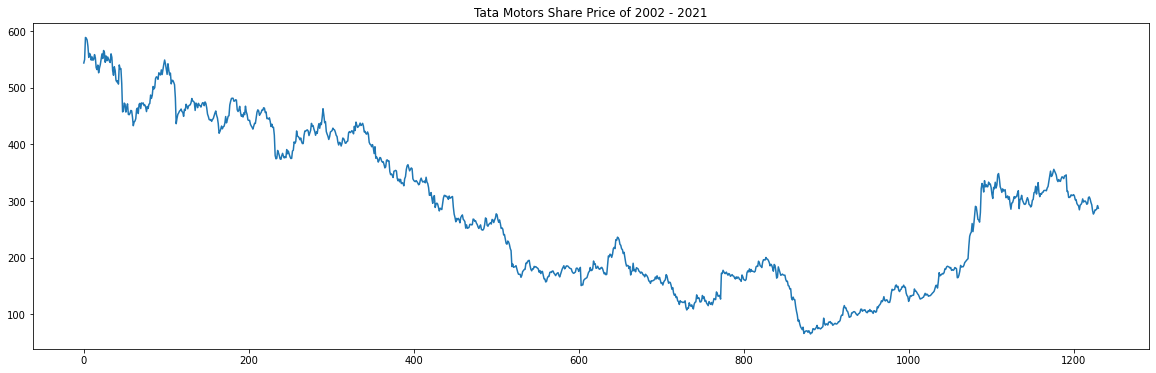

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,6))
plt.title('Tata Motors Share Price of 2002 - 2021')
plt.plot(df1)

In [13]:
pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     - 306 kB 3.4 MB/s
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-py3-none-any.whl size=8435 sha256=2e2f6b52bec5b96189fb2926fc5bc9cd7cf7fc103c1a105ba946400b71bbdbf9
  Stored in directory: /tmp/pip-ephem-wheel-cache-5r4w7mg4/wheels/eb/17/99/0f3929e635912eb25fc346aaf43b4ee3da4a80dee8ce3d2e4f
Successfully built mpl-finance


In [14]:
pip install --upgrade mplfinance

     |████████████████████████████████| 62 kB 912 kB/s 


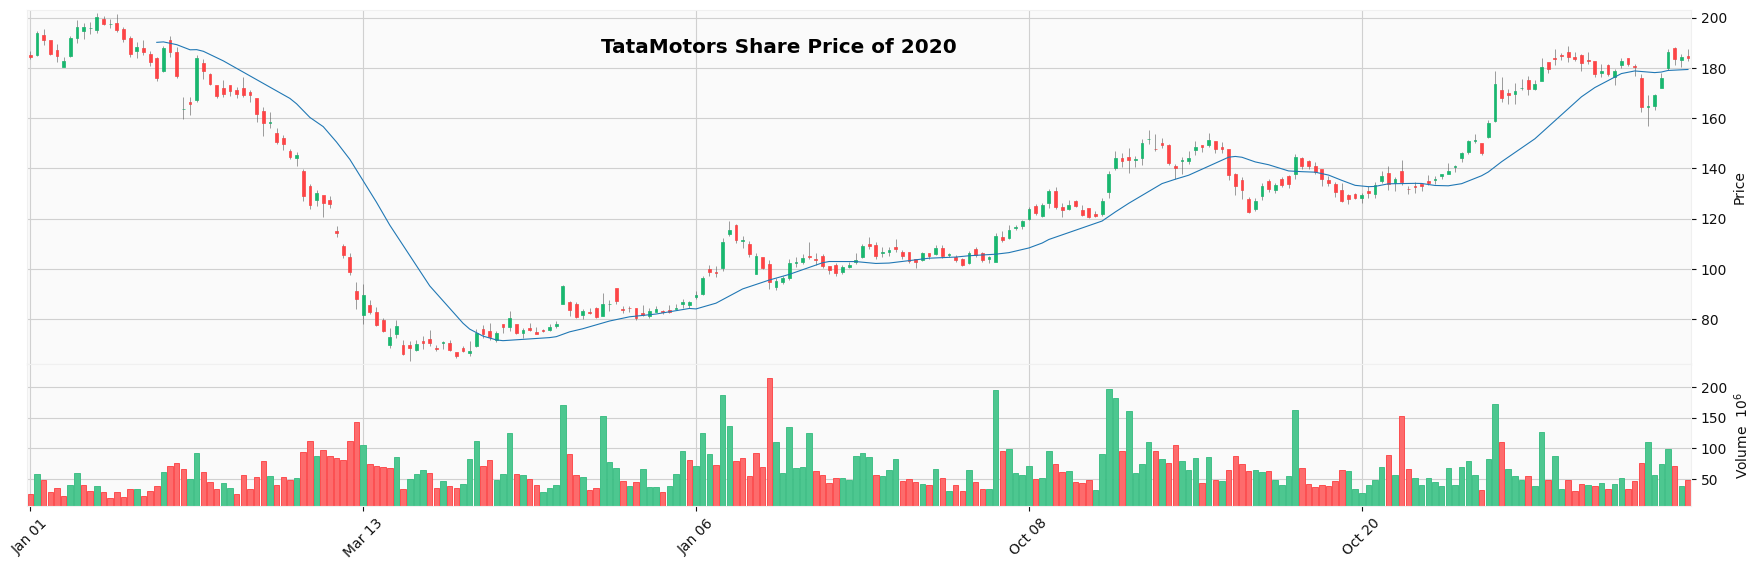

In [44]:
import mplfinance as mpf
mpf.plot(TataMotors['2020'], 
         type='candle', mav=(20), 
         volume=True, 
         title = 'TataMotors Share Price of 2020', 
         figratio=(20,6), tight_layout = True, 
         style = 'yahoo')

In [16]:
import numpy as np

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [18]:
df1

array([[0.91392819],
       [0.92577372],
       [1.        ],
       ...,
       [0.42118837],
       [0.43303402],
       [0.42414975]])

In [19]:
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [20]:
training_size, test_size

(923, 308)

In [21]:
len(train_data), len(test_data)

(923, 308)

In [22]:
import numpy 
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range (len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return numpy.array(dataX), numpy.array(dataY)

In [23]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [24]:
print(X_train)

[[0.91392819 0.92577372 1.         ... 0.90991589 0.92395876 0.91068017]
 [0.92577372 1.         0.99751626 ... 0.92395876 0.91068017 0.89224298]
 [1.         0.99751626 0.99140237 ... 0.91068017 0.89224298 0.87552537]
 ...
 [0.24035155 0.22993884 0.22812379 ... 0.04145968 0.04633168 0.05961023]
 [0.22993884 0.22812379 0.22401605 ... 0.04633168 0.05961023 0.06390905]
 [0.22812379 0.22401605 0.24207106 ... 0.05961023 0.06390905 0.0634314 ]]


In [25]:
print(X_train.shape), print(y_train.shape)

(822, 100)
(822,)


(None, None)

In [26]:
print(X_test.shape), print(y_test.shape)

(207, 100)
(207,)


(None, None)

In [27]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(60,return_sequences=True))
model.add(LSTM(80))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 60)           26640     
_________________________________________________________________
lstm_2 (LSTM)                (None, 80)                45120     
_________________________________________________________________
dense (Dense)                (None, 1)                 81        
Total params: 82,241
Trainable params: 82,241
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

Epoch 1/100
13/13 [==============================] - 9s 301ms/step - loss: 0.0466 - val_loss: 0.0128
Epoch 2/100
13/13 [==============================] - 3s 220ms/step - loss: 0.0082 - val_loss: 0.0053
Epoch 3/100
13/13 [==============================] - 3s 213ms/step - loss: 0.0034 - val_loss: 0.0031
Epoch 4/100
13/13 [==============================] - 3s 210ms/step - loss: 0.0019 - val_loss: 0.0040
Epoch 5/100
13/13 [==============================] - 3s 211ms/step - loss: 0.0016 - val_loss: 0.0032
Epoch 6/100
13/13 [==============================] - 3s 209ms/step - loss: 0.0015 - val_loss: 0.0030
Epoch 7/100
13/13 [==============================] - 3s 217ms/step - loss: 0.0015 - val_loss: 0.0033
Epoch 8/100
13/13 [==============================] - 3s 210ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 9/100
13/13 [==============================] - 3s 208ms/step - loss: 0.0015 - val_loss: 0.0028
Epoch 10/100
13/13 [==============================] - 3s 210ms/step - loss: 0.0015 - val_lo

In [32]:
import tensorflow as tf

In [33]:
tf.__version__

'2.6.0'

In [34]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [35]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [36]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

304.5648687110839

In [37]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

282.42767313275147

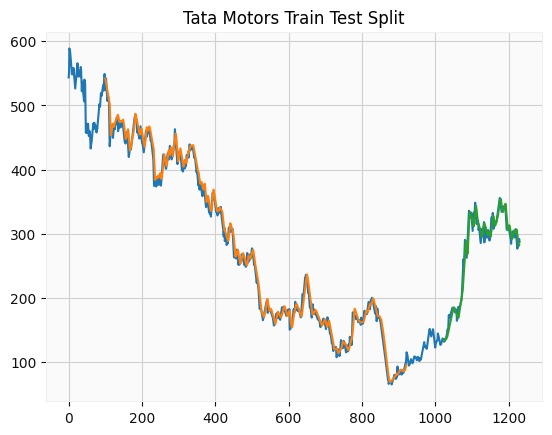

In [38]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.title('Tata Motors Train Test Split')
plt.show()

In [39]:
len(test_data)

308

In [45]:
x_input=test_data[208:].reshape(1,-1)
x_input.shape

(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.4276741]
101
1 day input [0.47506688 0.48318686 0.42271682 0.45385938 0.45510125 0.46752005
 0.45108901 0.44468854 0.43800149 0.43695069 0.4396255  0.45128008
 0.45968664 0.4520443  0.43666412 0.43504011 0.42825756 0.43217423
 0.45080243 0.45366831 0.47678639 0.47812377 0.4980894  0.47181886
 0.48872755 0.51041269 0.47602217 0.46312573 0.47344287 0.47105464
 0.47755062 0.47802826 0.48395109 0.48423766 0.48423766 0.48299579
 0.49235765 0.49742068 0.51518916 0.5353458  0.54919754 0.53123806
 0.53391286 0.54537637 0.55531143 0.54910203 0.54270156 0.53563238
 0.51987005 0.51394723 0.52082535 0.51576231 0.51461595 0.52416887
 0.5301872  0.52779897 0.52407336 0.53295757 0.53419944 0.53649216
 0.48070307 0.48108521 0.46054643 0.46045086 0.46264808 0.46933513
 0.46666026 0.46799769 0.46990828 0.46532289 0.45252195 0.45328617
 0.43991208 0.43532669 0.43198316 0.41870463 0.43484904 0.43685519
 0.44239587 0.45548339 0.44487961 0.44784105 0.44850971 0.4447841
 0.43733283 0.43972106 0.45987771 0

In [48]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [49]:
import matplotlib.pyplot as plt

In [50]:
len(df1)

1231

Text(0.5, 1.0, 'Tata Motors Prediction of Next 30 Days')

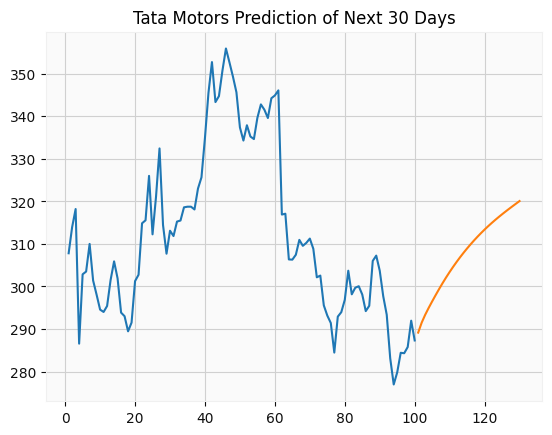

In [51]:
plt.plot(day_new,scaler.inverse_transform(df1[1131:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
plt.title('Tata Motors Prediction of Next 30 Days')

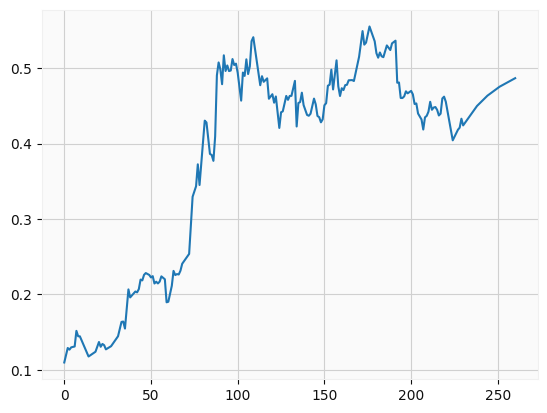

In [52]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])